TUGAS INSTRUMENTASI CERDAS

Nama : Dhia Salsabila Azhar

NIM  : 18/430187/PA/18700


Sensor yang digunakan untuk mendeteksi apakah tahu berformalin atau tidak yaitu, TGS 2610, TGS 2602, TGS 2620, TGS 2600, dan TGS 2611. Sensor-sensor tersebut sensitive terhadap gugus OH, CO, dan hidrokarbon karena formalin merupakan bahan kimia yang mudah teroksidasi. Sensor yang sangat peka dalam meresponse yaitu sensor TGS 2602 karena memiliki nilai variance yang paling besar.


Pada sensor TGS 2610 dapat mendeteksi unsur kimia berupa gas, komponen dari sensor ini merupakan propane dan butane. 

Sensor TGS 2602 untuk mengetahui kadar gas di luar ruang seperti amonia dan H2S yang berasal dari tempat pembuangan. Selain itu sensor juga dapat digunakan untuk memonitor VOC.

Sensor TGS 2620 untuk mengetahui kadar alcohol.

Sensor TGS 2600 merupakan sebuah sensor kimia atau sebuah sensor gas. Sensor ini mempunyai nilai resistansi Rs yang akan berubah bila terkena asap dan juga mempunyai sebuah pemanas (heater) yang digunakan untuk mendeteksi gas yang terkandung dalam asap rokok. 

Sensor TGS 2611 untuk mengetahui kadar natural gas (gas alami) diudara. Biasanya sensor ini digunakan untuk mendeteksi kebocoran dari natural gas . 


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

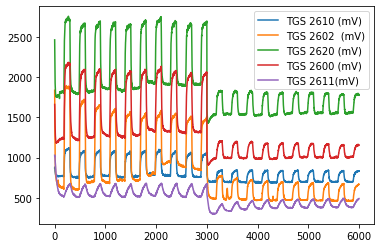

In [ ]:
file ='https://raw.githubusercontent.com/Dhiasalsabilaazhar/TUGASINCER/E-NOSE/datasensor.csv'
dataSensor = pd.read_csv(file, sep=';')
dataSensor.drop('kelas', axis=1).plot()

In [ ]:
cycles = np.arange(0,6001,300)

label = []
kelas = []

ciriMean = []
ciriVar  = []
ciriDiff = []
ciriIntg = []
ciriRel  = []
ciriFrac = []

for i in range(len(cycles)):
    if i==0:
        continue
    j=i-1
    
    data = dataSensor.iloc[cycles[j]+1:cycles[j+1]]
    
    string = str(cycles[j]+1) + '-' + str(cycles[j+1])
    label.append(string)
    
    target.append(int(data.kelas.head(1)))
    data = data.drop('kelas', axis=1)
    
    ciriMean.append(data.mean())
    ciriVar.append(data.var())
    ciriDiff.append(data.max() - data.min())
    ciriIntg.append(data.sum())
    ciriRel.append(data.max() / data.min())
    ciriFrac.append((data.max()-data.min()) / data.min())

In [ ]:
mean_ = pd.DataFrame(ciriMean, index=label)
mean_.columns = mean_.columns + '_mean'

var_ = pd.DataFrame(ciriVar, index=label)
var_.columns = var_.columns + '_variance'

diff_ = pd.DataFrame(ciriDiff, index=label)
diff_.columns = diff_.columns + '_difference'

intg_ = pd.DataFrame(ciriIntg, index=label)
intg_.columns = intg_.columns + '_integral'

rel_ = pd.DataFrame(ciriRel, index=label)
rel_.columns = rel_.columns + '_relative'

frac_ = pd.DataFrame(ciriFrac, index=label)
frac_.columns = frac_.columns + '_fraction'

In [ ]:
dataSensor.var()

TGS 2610 (mV)      15205.316591
TGS 2602  (mV)    148180.173367
TGS 2620 (mV)     145930.032798
TGS 2600 (mV)     132893.138727
TGS 2611(mV)       10835.643567
kelas                  1.000167
dtype: float64

In [ ]:
print(target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
features = pd.concat([mean_, var_, diff_, intg_, rel_, frac_], axis=1)
features = pd.concat([features, pd.DataFrame(target, index=label)], axis=1)
features.rename(columns={0: 'kelas'}, inplace=True)

In [ ]:
features.head()

,TGS 2610 (mV)_mean,TGS 2602 (mV)_mean,TGS 2620 (mV)_mean,TGS 2600 (mV)_mean,TGS 2611(mV)_mean,TGS 2610 (mV)_variance,TGS 2602 (mV)_variance,TGS 2620 (mV)_variance,TGS 2600 (mV)_variance,TGS 2611(mV)_variance,TGS 2610 (mV)_difference,TGS 2602 (mV)_difference,TGS 2620 (mV)_difference,TGS 2600 (mV)_difference,TGS 2611(mV)_difference,TGS 2610 (mV)_integral,TGS 2602 (mV)_integral,TGS 2620 (mV)_integral,TGS 2600 (mV)_integral,TGS 2611(mV)_integral,TGS 2610 (mV)_relative,TGS 2602 (mV)_relative,TGS 2620 (mV)_relative,TGS 2600 (mV)_relative,TGS 2611(mV)_relative,TGS 2610 (mV)_fraction,TGS 2602 (mV)_fraction,TGS 2620 (mV)_fraction,TGS 2600 (mV)_fraction,TGS 2611(mV)_fraction,kelas
1-300,893.635452,1125.852843,2141.037793,1559.101338,617.711371,23373.980484,321691.105252,186043.591419,183867.200871,13161.814098,357.7,1288.7,1024.1,1004.5,509.6,267197.0,336630.0,640170.3,466171.3,184695.7,1.467949,3.120968,1.590395,1.850622,2.000000,0.467949,2.120968,0.590395,0.850622,1.000000,1
301-600,873.609365,1026.459866,2129.336789,1557.183946,568.203344,19498.155550,248058.642142,143237.031125,138497.506923,2865.691667,343.0,1131.9,891.8,896.7,171.5,261209.2,306911.5,636671.7,465598.0,169892.8,1.460526,2.909091,1.500000,1.740891,1.339806,0.460526,1.909091,0.500000,0.740891,0.339806,1
601-900,875.215385,1050.714047,2141.168896,1562.411706,569.317726,19925.461440,185635.115305,143997.460070,132009.727480,2849.738175,343.0,975.1,896.7,862.4,166.6,261689.4,314163.5,640209.5,467161.1,170226.0,1.457516,2.431655,1.497283,1.695652,1.326923,0.457516,1.431655,0.497283,0.695652,0.326923,1
901-1200,882.901338,1026.869565,2162.473244,1577.767224,574.971572,17440.677314,158753.755681,127192.828141,118374.777714,2669.235531,328.3,935.9,842.8,842.8,161.7,263987.5,307034.0,646579.5,471752.4,171916.5,1.432258,2.384058,1.456233,1.671875,1.314286,0.432258,1.384058,0.456233,0.671875,0.314286,1
1201-1500,868.070234,1025.869900,2143.938462,1559.560201,568.596656,17457.494715,140309.846675,130106.830831,120279.783746,2946.262136,333.2,862.4,847.7,842.8,171.5,259553.0,306735.1,641037.6,466308.5,170010.4,1.444444,2.222222,1.466307,1.679842,1.339806,0.444444,1.222222,0.466307,0.679842,0.339806,1


In [ ]:
features.to_csv('gas feature.csv')

In [ ]:
features.index = np.arange(0,20)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
dfScaledFeat = pd.DataFrame(scaled_features,columns=features.columns)

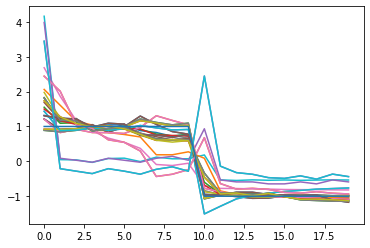

In [ ]:
dfScaledFeat.plot(legend=False)

In [ ]:
with pd.option_context('display.max_rows', 6, 'display.max_columns',5):
  print(dfScaledFeat)

    TGS 2610 (mV)_mean  TGS 2602  (mV)_mean  ...  TGS 2611(mV)_fraction  kelas
0             1.213076             1.207904  ...               3.445402    1.0
1             0.914384             0.824844  ...              -0.210523    1.0
2             0.938338             0.918320  ...              -0.281864    1.0
..                 ...                  ...  ...                    ...    ...
17           -0.973585            -1.057295  ...              -0.510064   -1.0
18           -0.983851            -1.073274  ...              -0.366228   -1.0
19           -0.977495            -1.086222  ...              -0.438146   -1.0

[20 rows x 31 columns]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,features['kelas'],test_size=0.1,shuffle=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [ ]:
import plotly
import plotly.express as px

fig = px.scatter_matrix(X_pca, color=y_train, range_color=[-1,2])

fig.update_traces(diagonal_visible=False)
fig.show()

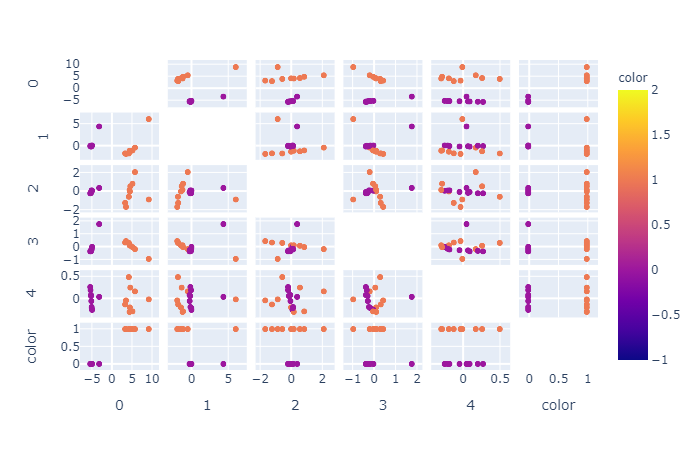

In [ ]:
from IPython.display import Image
Image(filename='newplot.png') 

Text(6, 0, 'Label 1')

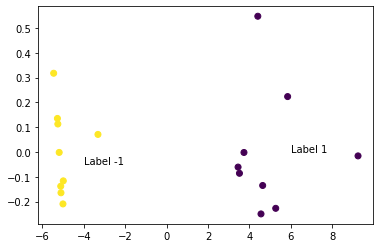

In [ ]:
colormap = np.arange(-1,2)

plt.scatter(X_pca[:,0], X_pca[:,4], c=colormap[np.array(y_train)])
plt.text(-4, -0.05, 'Label -1')
plt.text( 6, 0, 'Label 1')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca[:,[0,4]],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_pca_test[:,[0,4]])

array([-1,  1])

In [ ]:
print(y_test)

18   -1
3     1
Name: kelas, dtype: int64


Text(6, 0, 'Label 1')

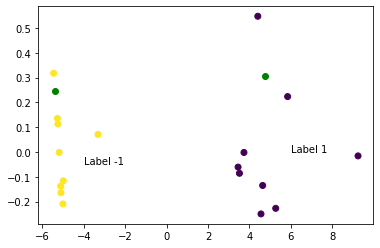

In [ ]:
colormap = np.arange(-1,2)

plt.scatter(X_pca[:,0], X_pca[:,4], c=colormap[np.array(y_train)])
plt.scatter(X_pca_test[:,0], X_pca_test[:,4], c='green')
plt.text(-4, -0.05, 'Label -1')
plt.text( 6, 0, 'Label 1')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)

array([-1,  1])

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

print('accuracy =',accuracy*100, '%')
print('label =',y_test[:15].ravel())
print('predicted label =',y_pred[:15].astype('int').ravel())

accuracy = 100.0 %
label = [-1  1]
predicted label = [-1  1]


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.predict(X_test)

array([-1,  1])

In [ ]:
y_pred = svc.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

print('accuracy =',accuracy*100, '%')
print('label =',y_test[:15].ravel())
print('predicted label =',y_pred[:15].astype('int').ravel())

accuracy = 100.0 %
label = [-1  1]
predicted label = [-1  1]
